In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/stroke-data.csv',delimiter = ',', encoding = 'utf-8')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


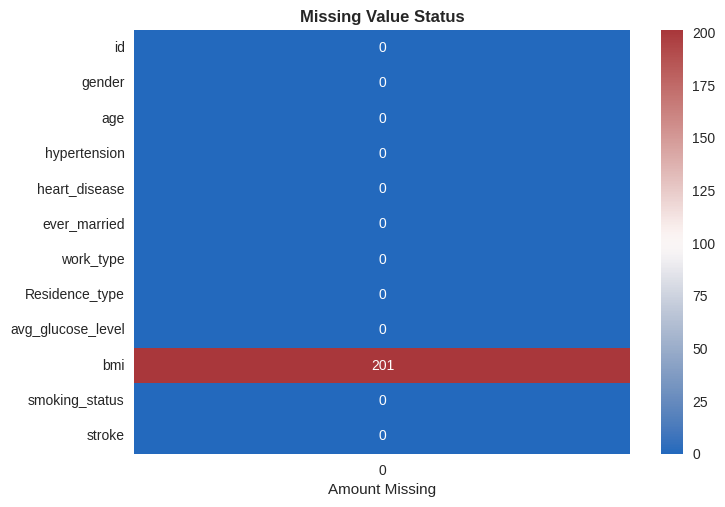

In [ ]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

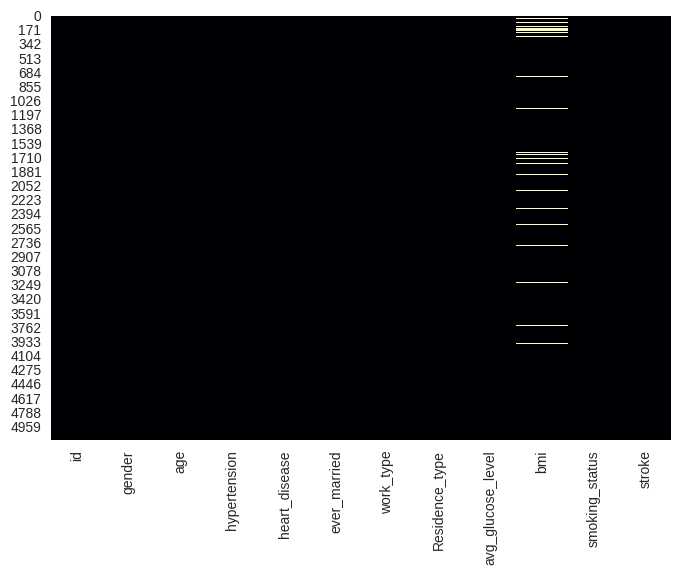

In [ ]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [ ]:
df.shape

(5110, 12)

In [ ]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2).T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.83,21161.72,67.00,17741.25,36932.00,54682.00,72940.00
age,5110.0,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5110.0,106.15,45.28,55.12,77.24,91.88,114.09,271.74
bmi,4909.0,28.89,7.85,10.30,23.50,28.10,33.10,97.60
stroke,5110.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00


In [ ]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop('id',axis=1,inplace=True)

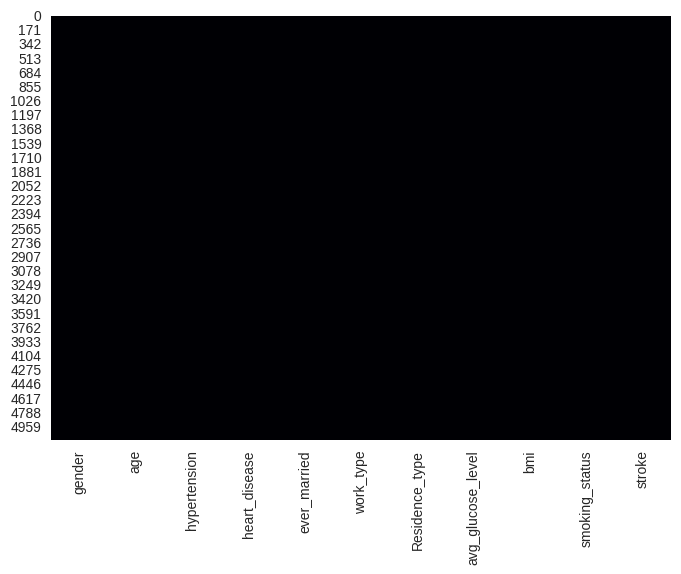

In [ ]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [ ]:
df.shape

(5110, 11)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['stroke'].replace({0: 'The patient did not have a stroke', 1: 'The patient had a stroke'}, inplace=True)

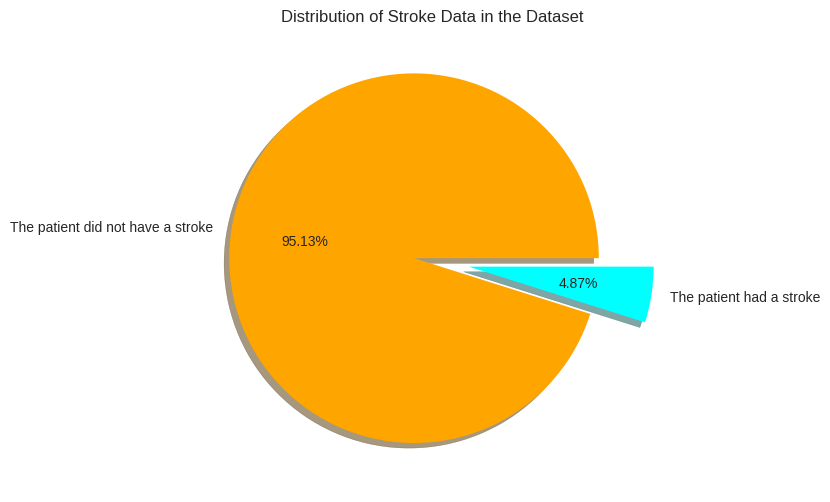

In [ ]:
## as I did before
vals = df['stroke'].value_counts().values
idx = df['stroke'].value_counts().index

## figure shape
plt.figure(figsize=(10, 6))


plt.pie(x=vals, labels=idx, explode=(0.1, 0.2), autopct='%1.2f%%',
        shadow=True, colors=('orange', 'cyan', 'brown', 'grey', 'indigo'))


## title and axis
plt.title("Distribution of Stroke Data in the Dataset")

##
plt.show()

<ipython-input-173-0228c67ad5d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df,orient='v',palette=['#BB18F3','#F3189A'])


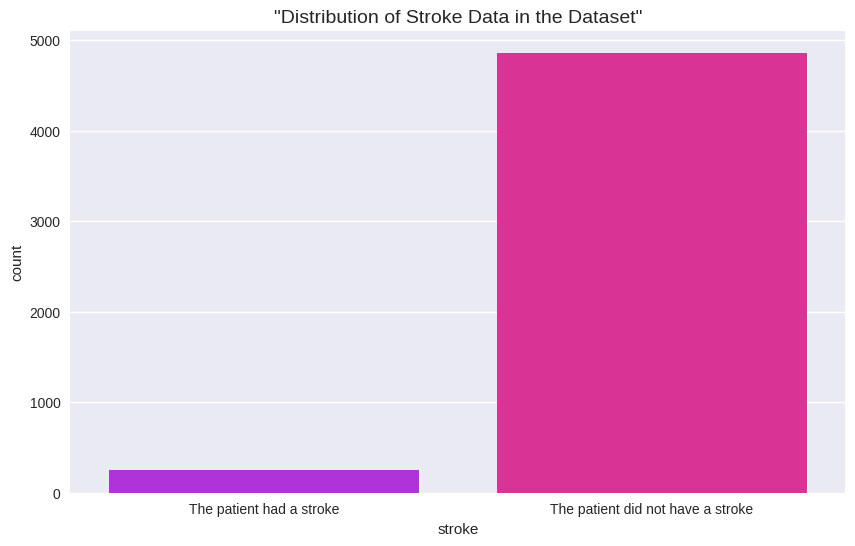

In [ ]:
## Let's get the countplot of (time) variable

plt.figure(figsize=(10, 6))    ## figure shape

sns.countplot(x='stroke', data=df,orient='v',palette=['#BB18F3','#F3189A'])

## title and axis
plt.title('"Distribution of Stroke Data in the Dataset"', fontsize=14)


plt.show()

In [ ]:
df.loc[df['gender'] == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,The patient did not have a stroke


In [ ]:
df = df.drop(df[df['gender'] == 'Other'].index)

In [ ]:
def plot_categorical_data (column_name ,a,b,c):
    plt.figure (figsize= (10,8))
    plt.suptitle(column_name, fontsize=20)
    plt.style.use('seaborn')
    plt.subplot(1,2,1)
    df[column_name].value_counts().plot(kind='bar',color=sns.color_palette(a))
    plt.subplot(1,2,2)
    df[column_name].value_counts().plot(kind='pie',autopct="%.2f%%", colors=[b, c])
    # draw circle
    centre_circle = plt.Circle((0, 0), 0.5, fc='white')
    fig = plt.gcf()
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    plt.show()

<ipython-input-176-c82a4529e400>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


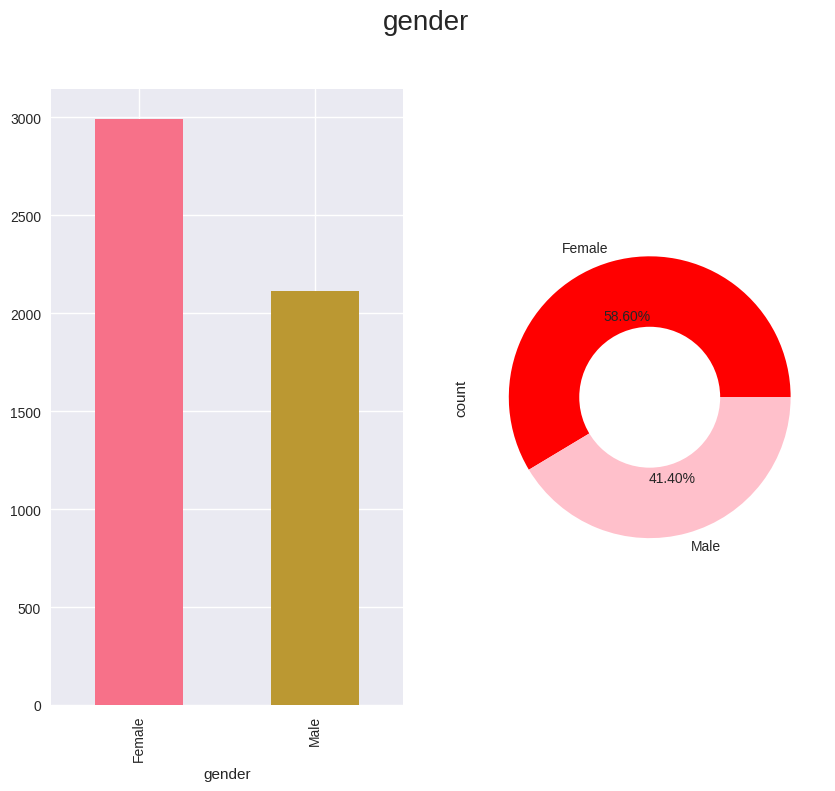

the unique value of Gender : 

['Male' 'Female']

----------------------------------------
The number of each value of Gender : 

gender
Female    2994
Male      2115
Name: count, dtype: int64


In [ ]:
plot_categorical_data ("gender","husl","red","pink")

print("the unique value of Gender : ")
print("")
print(df["gender"].unique())
print("")
print("-"*40)
print("The number of each value of Gender : ")
print("")
print(df["gender"].value_counts())

<ipython-input-176-c82a4529e400>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


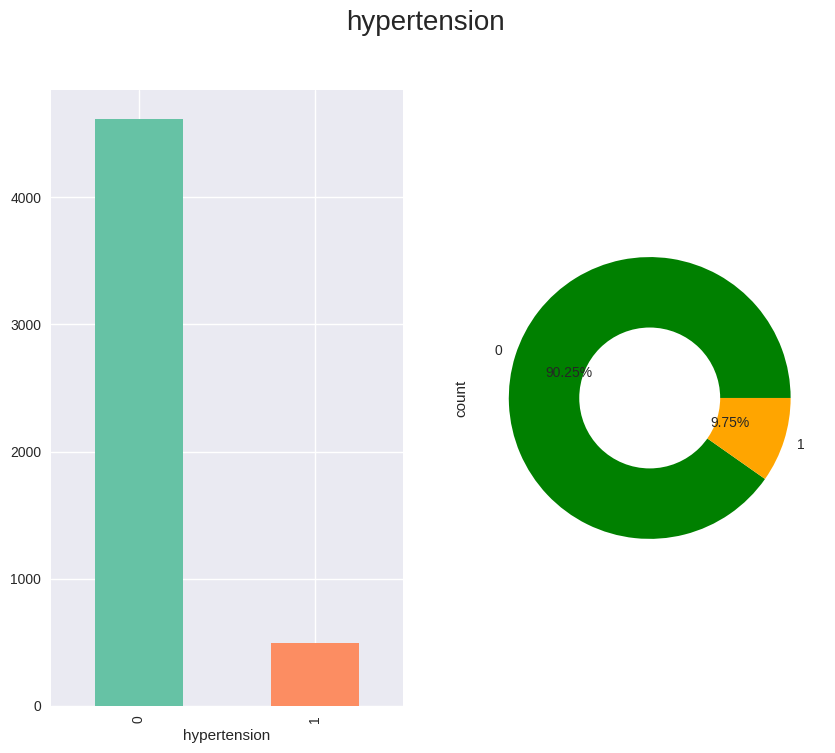

the unique value of Hypertension : 

[0 1]

----------------------------------------
The number of each value of Hypertension : 

hypertension
0    4611
1     498
Name: count, dtype: int64


In [ ]:
plot_categorical_data ("hypertension","Set2","green","orange")

print("the unique value of Hypertension : ")
print("")
print(df["hypertension"].unique())
print("")
print("-"*40)
print("The number of each value of Hypertension : ")
print("")
print(df["hypertension"].value_counts())


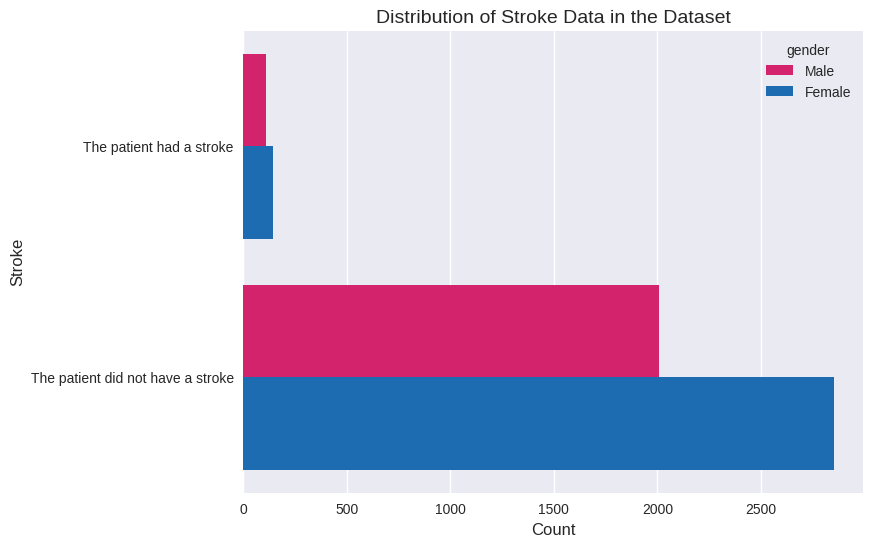

In [ ]:


plt.figure(figsize=(8, 6))    # Figure shape
df_filtered = df[df['gender'] != 'Other']
sns.countplot(y='stroke', data=df_filtered, orient='h',hue='gender',palette=['#F00669','#046DCB'])    # Countplot with 'orient' parameter set to 'h' for horizontal

# Title and axis labels
plt.title('Distribution of Stroke Data in the Dataset', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Stroke', fontsize=12)

plt.show()

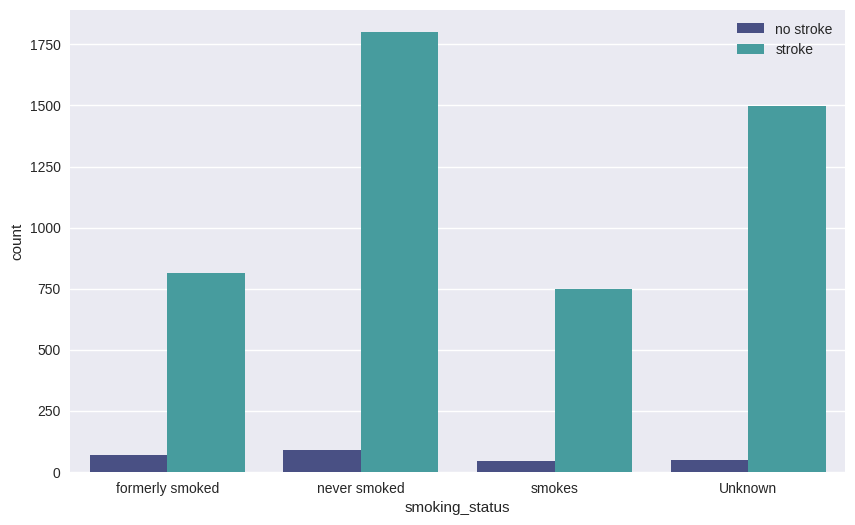

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])
plt.show()

Text(0.5, 1.0, 'Stroke Distribution Based on Work Type')

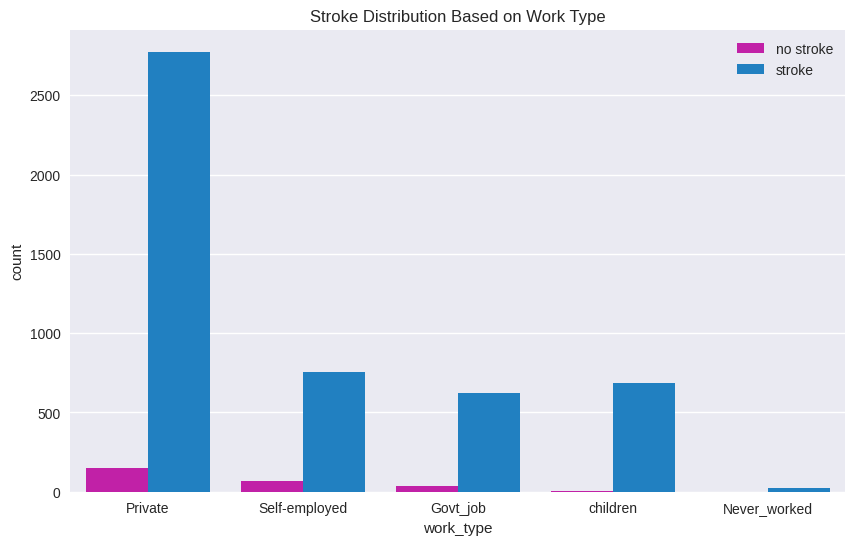

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=df, palette=['#DC06B9', '#0685DC'],hue='stroke')
plt.legend(['no stroke','stroke'])
plt.title('Stroke Distribution Based on Work Type')

Text(0.5, 1.0, 'Stroke Distribution Based on Residence Type')

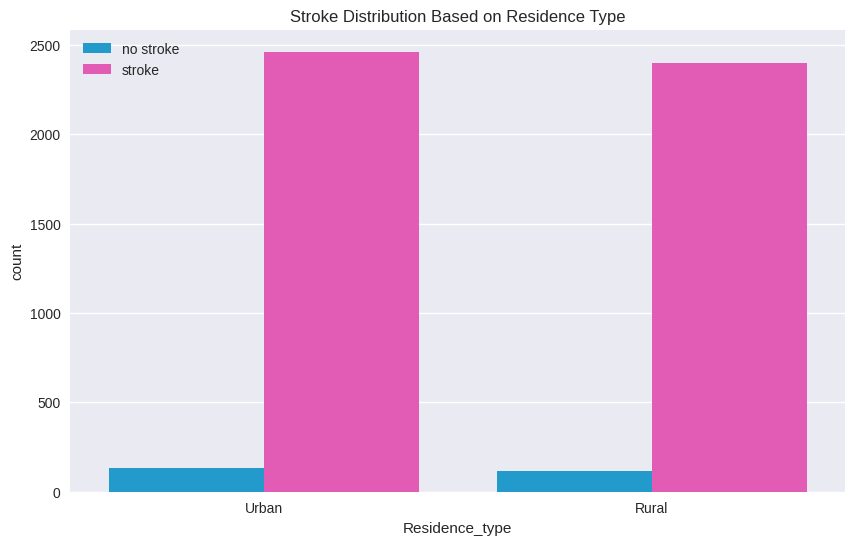

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=df, palette=['#06A7E8', '#F944BD'],hue='stroke')
plt.legend(['no stroke','stroke'])
plt.title('Stroke Distribution Based on Residence Type')

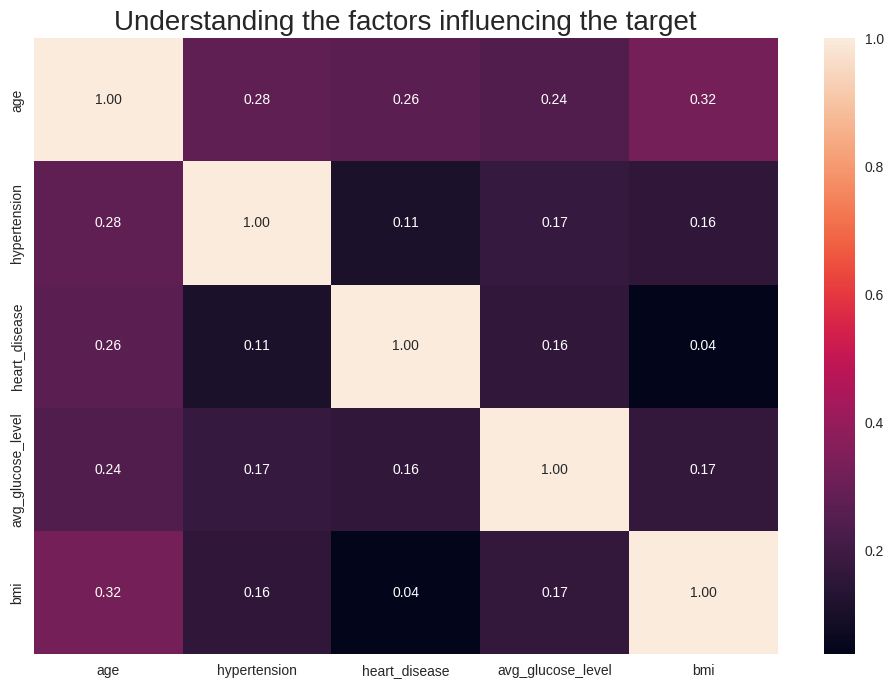

In [ ]:
param_list = ['age', 'hypertension','heart_disease','avg_glucose_level','bmi']  # List of parameters

plt.figure(figsize=(12, 8))  # Set the figure size

# Create a heatmap of the correlation matrix for the selected parameters (excluding the last one)
sns.heatmap(df[param_list[:]].corr(),annot=True, fmt=".2f")

# Set the title
plt.title("Understanding the factors influencing the target", fontsize=20)

# Display the plot
plt.show()

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,The patient had a stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,The patient had a stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,The patient had a stroke
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,The patient had a stroke
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,The patient had a stroke


<Figure size 2000x1000 with 0 Axes>

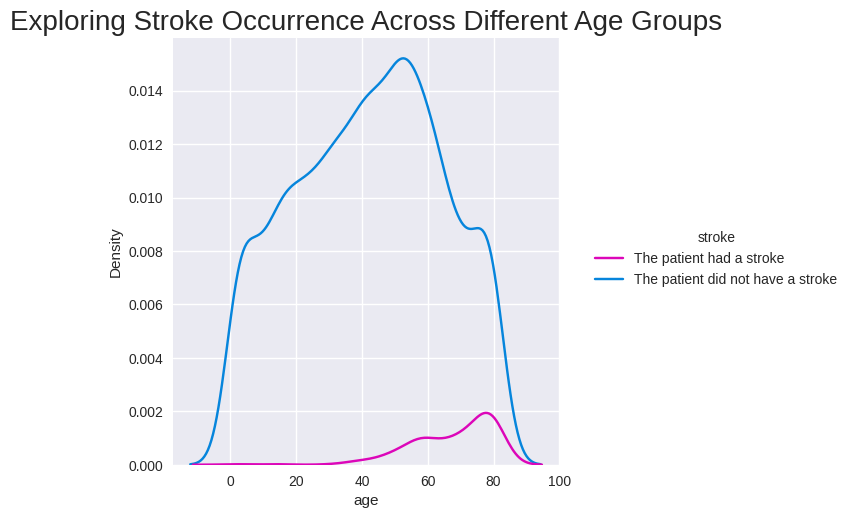

In [ ]:
my_palette = ['#DC06B9','#0685DC']

plt.figure(figsize=(20,10))

sns.displot(data=df, x="age", hue="stroke", kind="kde",palette=my_palette)
plt.title("Exploring Stroke Occurrence Across Different Age Groups",fontsize=20)
plt.show()

<Axes: ylabel='Density'>

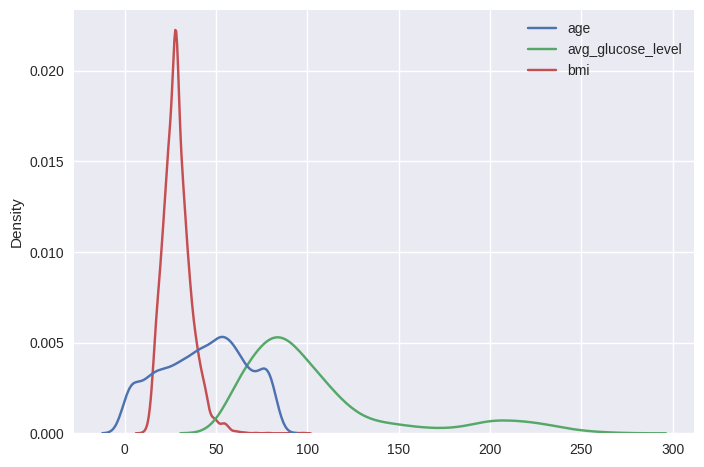

In [ ]:
numerical_data = df[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data)

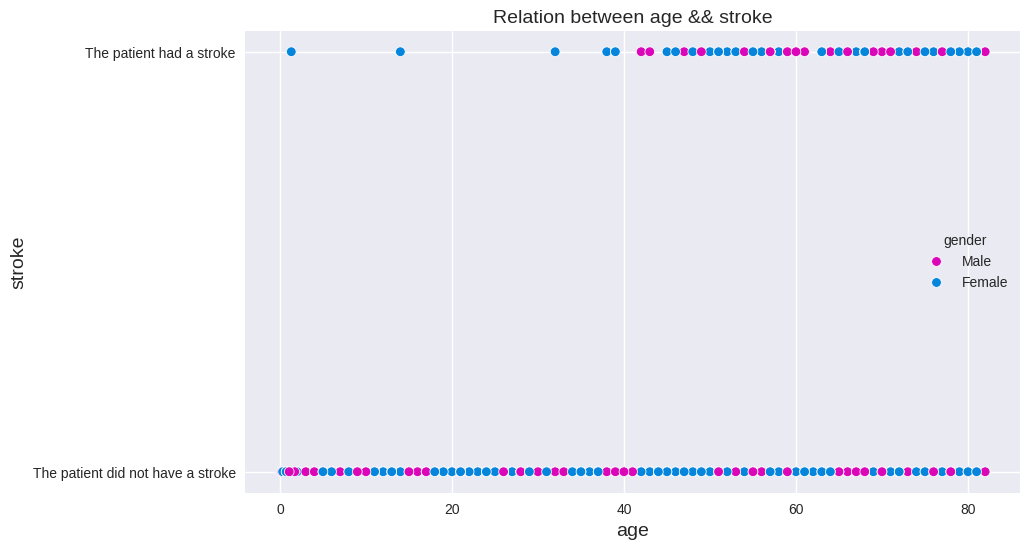

In [ ]:
plt.figure(figsize=(10, 6))    ## figure shape
# Filter the DataFrame to exclude rows where gender is 'Other'
df_filtered = df[df['gender'] !=2]

sns.scatterplot(x='age', y='stroke', data=df_filtered ,hue='gender',palette=['#DC06B9','#0685DC'])


## title and axis
plt.title('Relation between age && stroke', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.ylabel('stroke', fontsize=14)

plt.show()

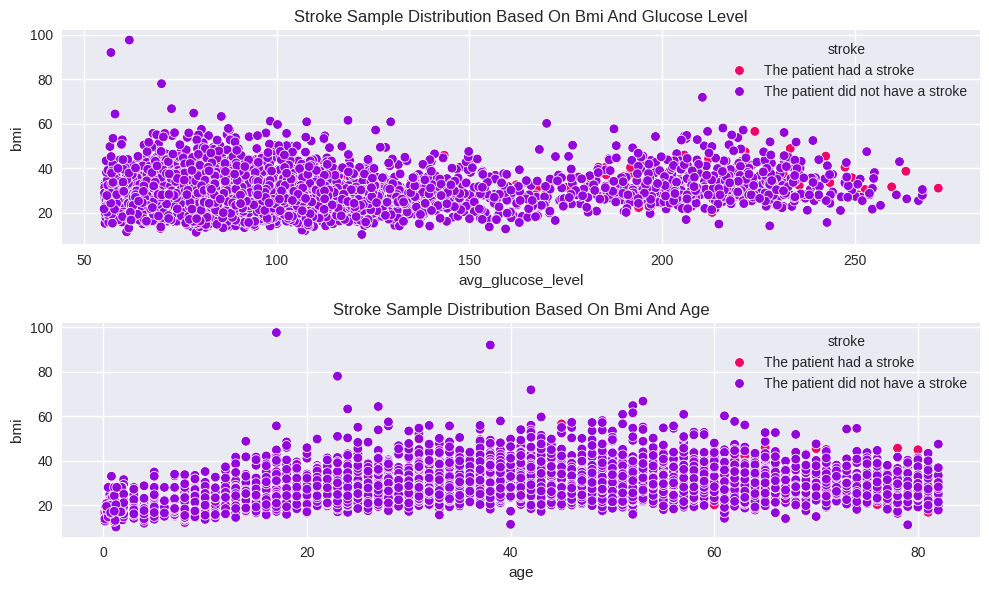

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'] ,palette=['#F00669','#9206DC'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'],palette=['#F00669','#9206DC'])
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,The patient had a stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,The patient had a stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,The patient had a stroke
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,The patient had a stroke
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,The patient had a stroke


In [ ]:
df['gender'].replace({'male':1, 'female': 0}, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,The patient had a stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,The patient had a stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,The patient had a stroke
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,The patient had a stroke
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,The patient had a stroke


Text(0, 0.5, 'stroke')

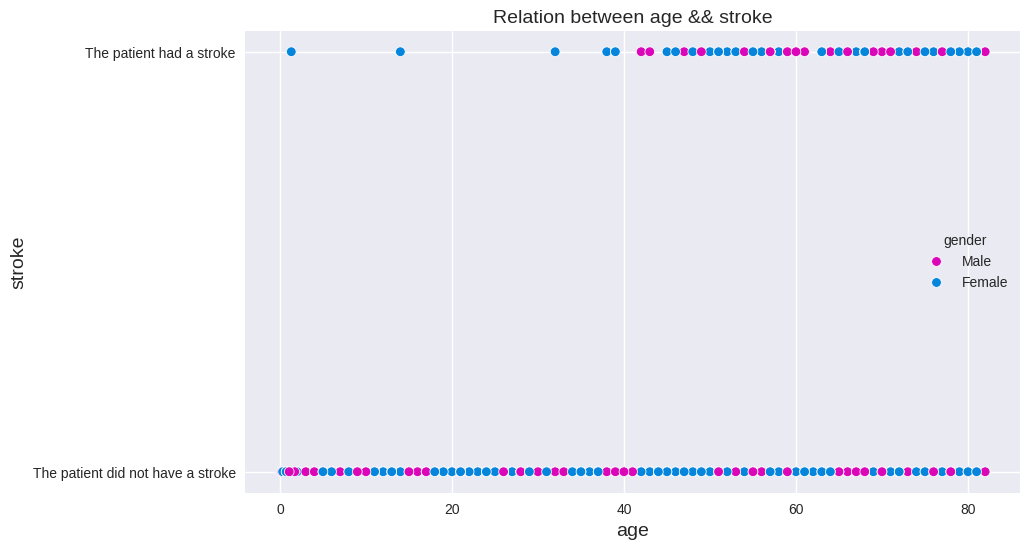

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Filter the DataFrame to exclude rows where gender is 'Other'
df_filtered = df[df['gender'] != 'Other']

# Create a scatter plot with age on the x-axis, stroke on the y-axis, and colored by gender
sns.scatterplot(x='age', y='stroke', data=df_filtered, hue='gender', palette=['#DC06B9', '#0685DC'])

# Set the title and axis labels
plt.title('Relation between age && stroke', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.ylabel('stroke', fontsize=14)

# Display

<Figure size 1200x800 with 0 Axes>

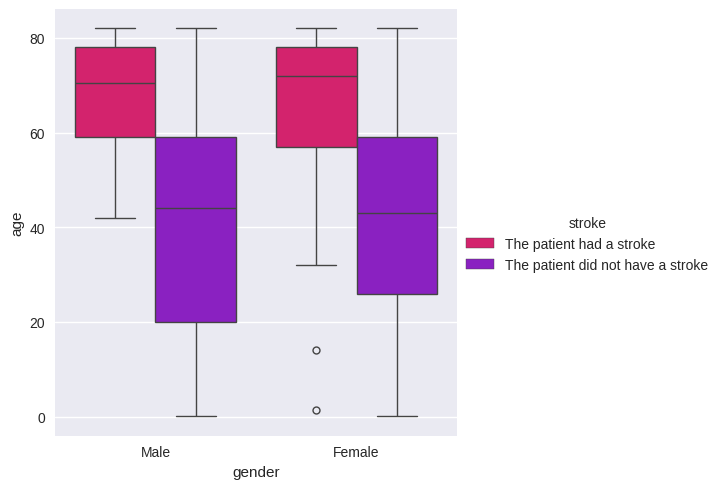

In [ ]:
plt.figure(figsize=(12, 8))    ## figure shape
df_filtered = df[df['gender'] != 'Other']
sns.catplot(y='age', x='gender', data=df_filtered, kind='box',hue='stroke',palette=['#F00669','#9206DC'])

<ipython-input-193-c8433c8e05a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y='avg_glucose_level', x='gender', data=df, kind='box',palette=['#DE0505','#055DDE'])


<Figure size 1200x800 with 0 Axes>

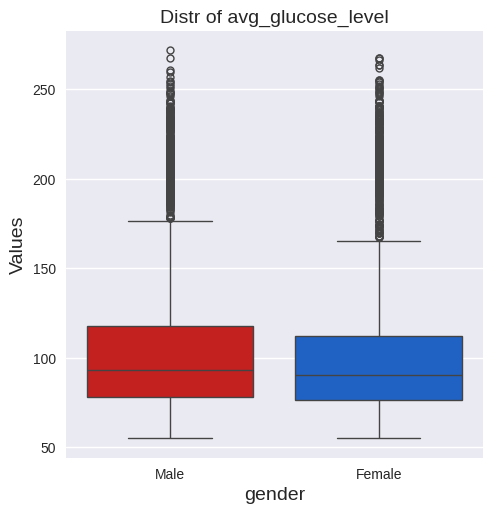

In [ ]:
plt.figure(figsize=(12, 8))    ## figure shape

sns.catplot(y='avg_glucose_level', x='gender', data=df, kind='box',palette=['#DE0505','#055DDE'])

## title and axis
plt.title('Distr of avg_glucose_level', fontsize=14)
plt.xlabel('gender', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.show()

<ipython-input-194-d46f68714ca2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y='bmi', x='gender', data=df, kind='box',palette=['#DE0505','#055DDE'])


<Figure size 1200x800 with 0 Axes>

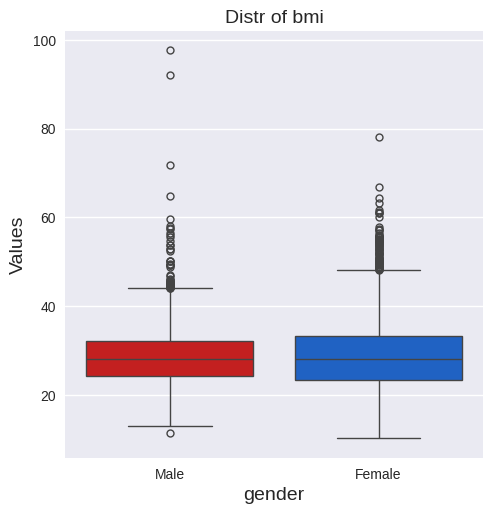

In [ ]:
plt.figure(figsize=(12, 8))    ## figure shape

sns.catplot(y='bmi', x='gender', data=df, kind='box',palette=['#DE0505','#055DDE'])

## title and axis
plt.title('Distr of bmi', fontsize=14)
plt.xlabel('gender', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.show()

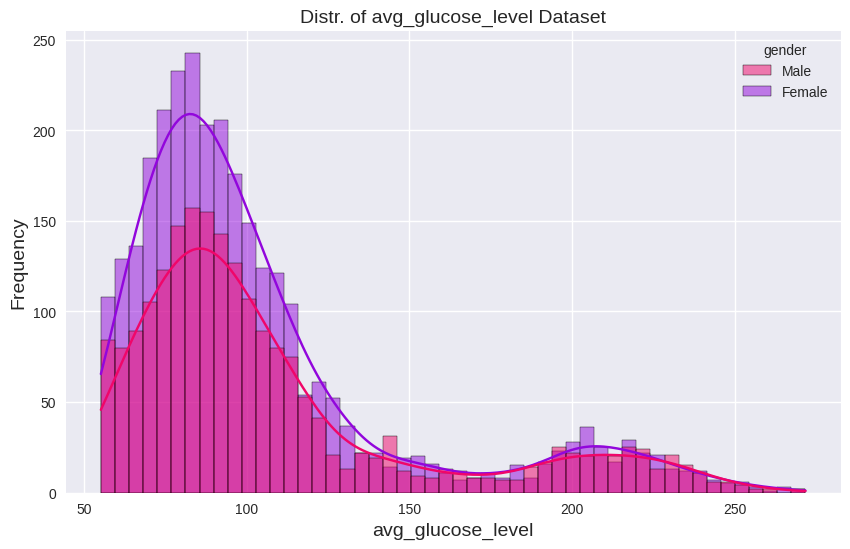

In [ ]:

plt.figure(figsize=(10, 6))    ## figure shape

sns.histplot(x='avg_glucose_level', data=df, bins=50, kde=True, hue='gender',palette=['#F00669','#9206DC'])

## title and axis
plt.title('Distr. of avg_glucose_level Dataset', fontsize=14)
plt.xlabel('avg_glucose_level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

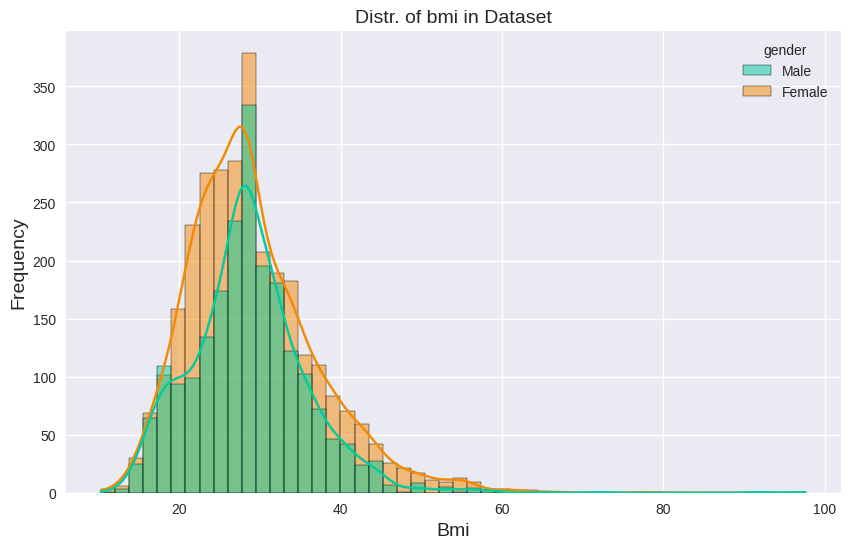

In [ ]:

plt.figure(figsize=(10, 6))    ## figure shape

sns.histplot(x='bmi', data=df, bins=50, kde=True, hue='gender',palette=['#02CB9D','#F28A04'])  ## I add hue=sex --> multi histogram

## title and axis
plt.title('Distr. of bmi in Dataset', fontsize=14)
plt.xlabel('Bmi', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [ ]:
# Converting text values to numbers using Label Encoding
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Iterate over each column in the DataFrame
for col_name in df.columns:
# Check if the number of unique values in the column is greater than 5
    if df[col_name].nunique() > 5:
# Apply Min-Max scaling to the column if it has more than 5 unique values
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [ ]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.203895,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1


In [ ]:

X = df.drop("stroke",axis=1)
# Target variable (y) is the "stroke" column
y =df['stroke']

In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1
1,0,0.743652,0,0,1,3,0,0.679023,0.203895,2
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,2,1,0.132167,0.203895,2
5106,0,0.987793,0,0,1,3,1,0.323516,0.340206,2
5107,0,0.426270,0,0,1,3,0,0.128658,0.232532,2
5108,1,0.621582,0,0,1,2,0,0.513203,0.175258,1


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [ ]:
# Import the train_test_split function from the scikit-learn model_selection module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4039,1,0.182129,0,0,0,4,0,0.090989,0.081329,0
576,1,0.353027,0,0,0,2,1,0.703813,0.143184,3
4013,1,0.536133,1,0,1,2,0,0.166928,0.185567,2
4536,0,0.829102,1,0,1,2,1,0.441418,0.343643,0
1180,0,0.755859,0,0,1,2,0,0.126720,0.294387,1
...,...,...,...,...,...,...,...,...,...,...
4427,0,0.743652,0,0,1,2,0,0.410950,0.223368,2
466,0,0.743652,1,0,1,2,0,0.530560,0.571592,3
3092,0,0.013184,0,0,0,4,1,0.194627,0.085911,0
3773,0,0.462891,0,0,1,0,0,0.179162,0.128293,2


In [ ]:
# Create an instance of the LinearRegression model
lin_Reg = LinearRegression()

In [ ]:
lin_Reg.fit(X,y)

LinearRegression()

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
y_pred = lin_Reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred_train = lin_Reg.predict(X_train)

In [ ]:
y_pred

array([0.03432068, 0.00809277, 0.04708125, ..., 0.01038651, 0.06150724,
       0.05379882])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error , mean_squared_error


In [ ]:
mean_absolute_error(y_test,y_pred)

0.10118873807702701

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

226923654539468.56

In [ ]:
mean_squared_error(y_test,y_pred)


0.04979555078325856

In [ ]:
mean_squared_error(y_test,y_pred)*100


4.979555078325856

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly = poly_reg.predict(X_test_poly)

In [ ]:
mse = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0546670908842264


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Logistic Regression accuracy score with all the features: 94.1944


In [ ]:
svm_classifier = SVC(kernel='linear')

In [ ]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9419439008480104
